# Ejercicio práctico de una red neuronal construida a mano
---

Autor: Eduardo Ballesteros Pérez

Fecha: 2025-12-01

Versión: 1.0

Enunciado: El modelo base de Red Neuronal Convolucional (CNN), entrenado sobre el Emnist Dataset para clasificación multiclase, ha alcanzado una precisión (accuracy) de 0.94 en los datos de prueba.
Tarea: El objetivo es mejorar la capacidad de generalización del modelo aumentando su precisión (accuracy) por encima de 0.94.
Metodología: Debe modificar la arquitectura de la red neuronal, lo cual se realiza añadiendo o ajustando las capas en el modelo secuencial. Esto implica el uso de prueba y error para optimizar la secuencia y el tipo de capas (como capas de convolución, Max Pulling o Batch Normalization) hasta obtener un rendimiento superior.
Nota Importante: Se advierte que el esfuerzo para mejorar el accuracy de 0.94 a rangos como 0.95 o 0.97 es sustancialmente mayor (un 80% más de esfuerzo) que el proceso inicial.

# 0 - Instalaciones necesarias e importación de librerías utilizadas

## Instalación de librerías

In [2]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Imports

In [4]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D, BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy

from keras.datasets import mnist

## Carga y formato de los datos

Number of classes: 10
Example of handwritten digit with correlated noise: 



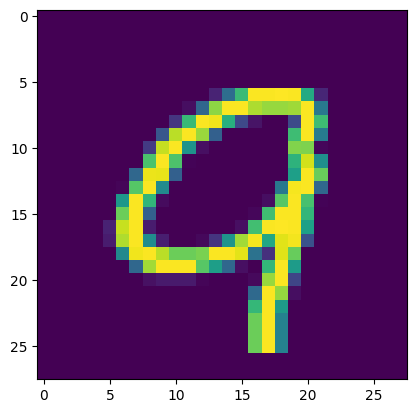

Class: 9

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_cls = len(np.unique(y_train))
print('Number of classes: ' + str(num_cls))

print('Example of handwritten digit with correlated noise: \n')

k = 3000
plt.imshow(np.squeeze(x_train[k,:,:]))
plt.show()
print('Class: '+str(y_train[k])+'\n')

# RESHAPE and standarize
x_train = np.expand_dims(x_train/255,axis=3)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_cls)

print('Shape of x_train: '+str(x_train.shape))
print('Shape of y_train: '+str(y_train.shape))

## Entrenamiento

In [6]:
model_name='CNN' # To compare models, you can give them different names

pweight='./weights/weights_' + model_name  + '.keras'

if not os.path.exists('./weights'):
  os.mkdir('./weights')

## EXPLORE VALUES AND FIND A GOOD SET
b_size = 4 # batch size
val_split = 0.5 # percentage of samples used for validation
ep = 5 # number of epochs

C:\Users\balle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/5
7495/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8092 - loss: 0.6982
Epoch 1: val_loss improved from None to 0.13839, saving model to ./weights/weights_CNN.keras
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.8831 - loss: 0.4250 - val_accuracy: 0.9619 - val_loss: 0.1384
Epoch 2/5
7495/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9430 - loss: 0.2165
Epoch 2: val_loss improved from 0.13839 to 0.06939, saving model to ./weights/weights_CNN.keras
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9451 - loss: 0.2127 - val_accuracy: 0.9814 - val_loss: 0.0694
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9604 - loss: 0.1415
Epoch 3: val_loss did not improve from 0.06939
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.9615 - loss: 0.1433 - val_accuracy: 0.9820 - val_loss: 0.0695
Epoch 4/5
7496/7500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9672 - loss: 0.1185
Epoch 4: val_loss improved from 0.06939 to 0.05418, s

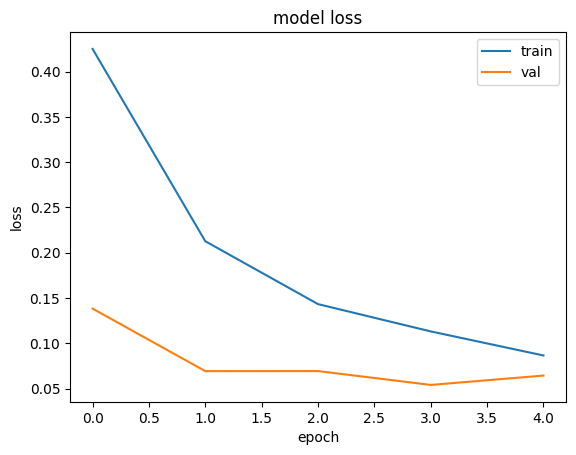

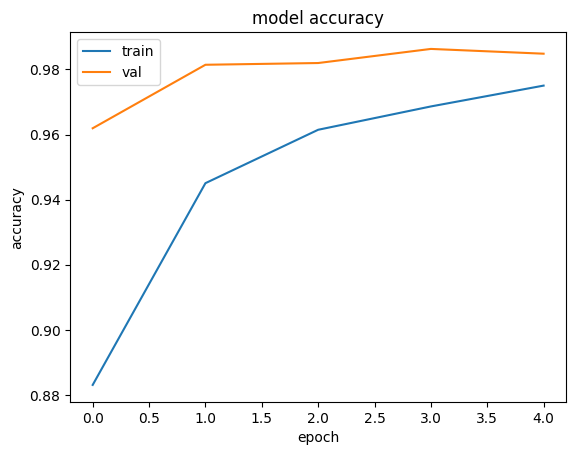

In [7]:
input_shape = x_train.shape[1:4] #(28,28,1)
model = Sequential()

## EXPLORE LAYERS, # CHANNELS... Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D
## SEE KERAS MANUAL https://keras.io/layers/about-keras-layers/


# Aumentamos los filtros a 32 para aprender características más ricas.
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape)) 
model.add(BatchNormalization()) # NUEVA CAPA: Normaliza las activaciones para acelerar y estabilizar el entrenamiento.
model.add(MaxPooling2D(pool_size=(2, 2))) # NUEVA CAPA: Reduce la dimensionalidad (submuestreo) y aumenta la robustez.


# Añadimos un segundo bloque con más filtros (64) para detectar patrones más complejos.
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # NUEVA CAPA: Dropout para regularización y evitar el sobreajuste (overfitting).


model.add(Flatten())
model.add(Dense(128, activation='relu')) # NUEVA CAPA: Capa densa intermedia para una combinación de características de alto nivel.
model.add(Dropout(0.5)) 

model.add(Dense(num_cls, activation='softmax')) # This is a necessary output layer, however, you can add more dense layers before with different activation functions

# Usamos Adam (mejor en la práctica) con una tasa de aprendizaje más conservadora.
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001), # explore other optimizers: Adam, SGD, Adadelta
              metrics=['accuracy'])

model.summary()


checkpointer = ModelCheckpoint(filepath=pweight, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min') # NUEVO CALLBACK: Detiene el entrenamiento si val_loss no mejora después de 5 épocas.
callbacks_list = [checkpointer, early_stopping] # explore adding other callbacks such as ReduceLROnPlateau, EarlyStopping

history=model.fit(x_train, y_train,
                    epochs=ep,
                    batch_size=b_size,
                    verbose=1,
                    shuffle=True,
                    validation_split = val_split,
                    callbacks=callbacks_list)

print('CNN weights saved in ' + pweight)

# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Predicciones en el dataset de prueba

In [10]:
from keras.models import load_model

num_cls = len(np.unique(y_test))
print('Number of classes: ' + str(num_cls))

# RESHAPE and standarize
x_test = np.expand_dims(x_test/255,axis=3)

print('Shape of x_test: '+str(x_test.shape)+'\n')

## Define model parameters
model_name='CNN' # To compare models, you can give them different names
pweight='./weights/weights_' + model_name  + '.keras'

model = load_model(pweight)
y_pred_aux = model.predict(x_test)
y_pred=np.argmax(y_pred_aux,axis=1)

Acc_pred = sum(y_pred == y_test)/len(y_test)

print('Accuracy in test set is: '+str(Acc_pred))


Number of classes: 10
Shape of x_test: (10000, 28, 28, 1, 1, 1)



ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 28, 28, 1, 1, 1), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (32, 28, 28, 1, 1, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28, 1, 1, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>